# Домашнее задание 3

Это домашнее задание по материалам первых трёх семинаров. Дедлайн по отправке - 02:00 3 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 

## Задача 1 (2 pts)

Упражнение 1.3 из [пособия лектора](https://arxiv.org/ftp/arxiv/papers/1711/1711.00394.pdf). Пожалуйста, пишите чёткие обоснования для каждого перехода в доказательстве. Цель этой задачи мотивировать вас разобраться в том, как и почему работает концепция построения нижних оценок сложности методов оптимизации.  

In [ ]:
# Место для Вашего решения

## Задача 2 (0.5 pts)

Покажите, что сопряжённые направления являются линейно независимыми

Допустим противное. Тогда есть нетривиальная линейная комбинация, равная нулю.
$$
a_1 p_1 + ... + a_n p_n = 0
$$
Умножим выражение на $p_i^TA$. Вместе с условием сопряженности получим:
$$
a_i p_i^TAp_i = 0
$$
Перебрав так все возможные i, получим $a_i = 0 \quad \forall i$. Противоречие

## Задача 3 (5 pts)

- (2 pts) Проверьте, что направления в методе сопряжённых градиентов для квадратичной целевой функции и в методе Флетчера-Ривса являются направлениями убывания. Для любой ли стратегии линейного поиска шага в методе Флетчера-Ривса полученное направление будет направлением убывания? Почему?

- (3 pts) Даёт ли процедура дробления шага шаг, удовлестворяющий условию Вольфа? Если нет, то почему и как её нужно модифицировать, чтобы найти шаг, удовлетворяющий условию Вольфа? Покажите экспериментально, что предложенная Вами процедура работает.

1. Рассмотрим скалярное произведение градиента и направления из метода сопряженных градиентов в точке $x_k$.
$$
\langle r_k, p_k \rangle = \langle r_k, -r_k + \beta_k p_{k-1} \rangle  = -r_k^2 +\beta_k \langle r_k, p_{k-1} \rangle
$$

$$
r_k = A(x_{k-1} + \alpha_{k-1}p_{k-1}) - b = r_{k-1} + \alpha_{k-1}Ap_{k-1})
$$

$$
\alpha_k = -\dfrac{p^{\top}_k r_k}{p^{\top}_{k}Ap_{k}} 
$$

$$
\langle r_{k}, p_{k-1} \rangle = \langle r_{k-1}, p_{k-1} \rangle - \dfrac{p^{\top}_{k-1} r_{k-1}}{p^{\top}_{k-1}Ap_{k-1}} \langle Ap_{k-1}, p_{k-1} \rangle = 0
$$

$$
\langle r_k, p_k \rangle = -r_k^2 < 0
$$
Выбранный вектор направлен ближе к антиградиенту, чем к градиенту

2. Метод Флетчера-Ривса:
$$
p_{k+1} = -f'(x_{k+1}) + \beta_k p_k
$$

Из условия сопряженности $\beta_k = \frac{p_k^TAf'(x_{k+1})}{p_k^TAp_k}$

$$
\langle f'(x_{k+1}), p_{k+1}\rangle = -f'(x_{k+1})^2 + \beta_k \langle f'(x_{k+1}), p_{k}\rangle
$$
В силу произвольности f можем получить выражение $> 0$ на каком-то этапе

3. Условие Вольфа:
$$
f(x_k) - f(x_{k + 1}) \geq \beta_1 \alpha\langle f'(x_k), p_k\rangle
$$

$$
\langle f'(x_{k+1}), p_k\rangle \geq \beta_2\langle f'(x_k), p_k\rangle
$$

## Задача 4 (4 pts)

Исследуйте зависимость числа итераций необходимого для сходимости линейного метода сопряжённых градиентов от распределения собственных значений матрицы $A$. 
Рассмотрите следующие сценарии:

- собственные значения распределены равномерно на некотором отрезке
- собственные числа распределены блоками около некоторых заданных чисел в окрестности радиуса $\varepsilon$, например каждые 5 собственных значений находятся в окрестности радиуса $0.5$ около чисел кратных 5. Придумайте свою стратегию генерации матриц по заданному сценарию

Постройте соответствующий график для каждого сценария. Если сценарий зависит от параметра, то на одном графике изобразите зависимость для нескольких наиболее характерных параметров, добавьте легенду и сделайте вывод об устойчивости оценки сходимости метода сопряжённых градиентов относительно распределение спектра матрицы.

In [1]:
import liboptpy.base_optimizer as base
import numpy as np
import random
import liboptpy.unconstr_solvers.fo as fo
import liboptpy.step_size as ss
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 100

def random_ort_matrix(n):
    S = np.random.random((n,n))
    q = np.linalg.qr(S)
    return q[0]

def random_matrix_equal(n):
    eigenvalues = [np.random.uniform(0, n) for i in range(n)]
    S = random_ort_matrix(n)
    A = np.diag(eigenvalues)
    A = np.dot(S.T, np.dot(A,S))
    return (A + A.T) / 2

def random_matrix_unequal(n, step=20):
    eigenvalues = np.ndarray(n)
    for i in range(n):
        eigenvalues[i] = random.uniform((i // step) * step - 0.5, (i // step) * step + 0.5)
    S = random_ort_matrix(n)
    A = np.diag(eigenvalues)
    A = np.dot(S.T, np.dot(A,S))
    return (A + A.T) / 2

f1 = lambda x: 0.5 * x.dot(A1.dot(x)) - b.dot(x)
grad_f1 = lambda x: A1.dot(x) - b

f2 = lambda x: 0.5 * x.dot(A2.dot(x)) - b.dot(x)
grad_f2 = lambda x: A2.dot(x) - b

In [3]:
b = np.random.randn(n)
A1 = random_matrix_equal(n)
A2 = random_matrix_unequal(n)
x0 = np.ones(n)

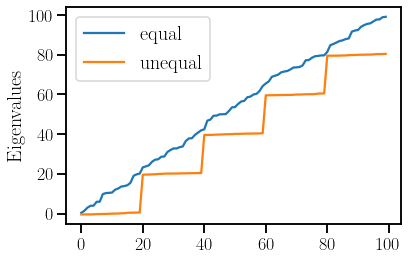

In [4]:
plt.rc("text", usetex=True)
plt.rc("font", family='serif')

import seaborn as sns
sns.set_context("talk")

eigs1 = np.linalg.eigvalsh(A1)
eigs2 = np.linalg.eigvalsh(A2)
plt.plot(np.unique(eigs1), label=r"equal")
plt.plot(np.unique(eigs2), label=r"unequal")
plt.ylabel("Eigenvalues", fontsize=20)
plt.xticks(fontsize=18)
plt.legend(loc="best", fontsize=20)
_ = plt.yticks(fontsize=18)
plt.show()

In [136]:
def ConjugateGradientQuadratic(x0, A, b, tol=1e-8, callback=None):
    x = x0
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) > tol:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        if callback is not None:
            callback(x)
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x

In [137]:
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss

max_iter = 200
print("\t CG quadratic for equal")
cg_quad1 = methods.fo.ConjugateGradientQuad(A1, b)
x_cg1 = cg_quad1.solve(x0, tol=1e-7, max_iter=max_iter, disp=True)

print("\t CG quadratic for unequal")
cg_quad2 = methods.fo.ConjugateGradientQuad(A2, b)
x_cg2 = cg_quad2.solve(x0, tol=1e-7, max_iter=max_iter, disp=True)


	 CG quadratic for equal
Convergence in 53 iterations
Function value = -2.5147430751501805
Norm of gradient = 9.9398148426337e-08
	 CG quadratic for unequal
Convergence in 99 iterations
Function value = -15.199776356899138
Norm of gradient = 9.936272920893133e-08


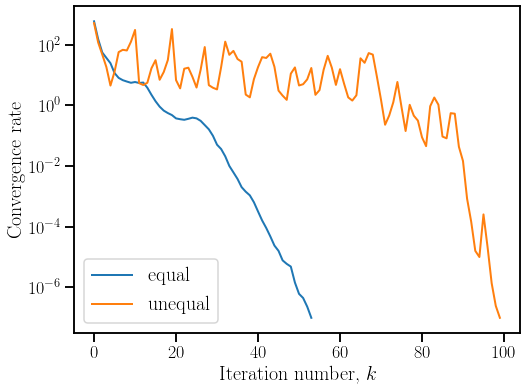

In [138]:
plt.figure(figsize=(8,6))
plt.semilogy([np.linalg.norm(grad_f1(x)) for x in cg_quad1.get_convergence()], label=r"equal", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f2(x)) for x in cg_quad2.get_convergence()], label=r"unequal", linewidth=2)

plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Convergence rate", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

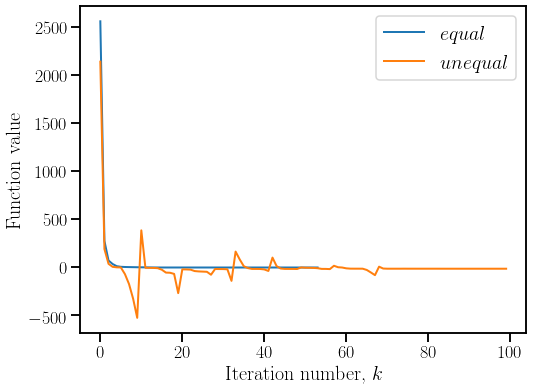

In [139]:
plt.figure(figsize=(8,6))
plt.plot([f1(x) for x in cg_quad1.get_convergence()], label=r"$equal$", linewidth=2)
plt.plot([f2(x) for x in cg_quad2.get_convergence()], label=r"$unequal$", linewidth=2)
plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Function value", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

## Задача 5 (3 pts)

Сравните сходимость градиентного спуска, метода сопряжённых градиентов, метода тяжёлого шарика и ускоренного метода Нестерова для задачи

$$
\min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right)
$$

Матрицу $A \in \mathbb{R}^{m \times n}$ и вектор $b$ сгенерируйте случайным образом, рассмотрите различные значения $m$ и $n$ ($m > n$ и $m < n$). 
Какой способ выбора шага для каждого из методов дал наилучшую сходимость? 
Обратите внимание на то, как устойчиво вычислить значения целевой функции. Если вы будете делать это влоб, то промежуточное значение для суммы экспонент может не поместиться в числа типа ```double```

$$
\frac{\partial f}{\partial x_j} = \frac{\sum_{i=1}^m \exp(a_i^{\top}x + b_i) a_{ij}}{\sum_{i=1}^m \exp(a_i^{\top}x + b_i)}
$$

$$
f'(x) = \frac{A \exp(Ax + b)}{\sum_{i=1}^m \exp(a_i^{\top}x + b_i)}
$$

Для устойчивого вычисления функции составим вектор из экспонент $\exp(a_i^{\top}x + b_i)$, затем поделим его на бесконечную норму. В результате компоненты станут не больше 1, и их можно без проблем просуммировать. Добавить норму можно уже после логарифмирования. С градиентом поступим аналогично, поделив числитель и знаменатель на норму.

In [11]:
from math import log, exp
import numpy as np

def f(x):
    y = np.exp(A.dot(x) + b)
    c = np.linalg.norm(y, np.inf)
    y = y / c
    return log(np.sum(y)) - log(c)

def grad(x):
    y = np.exp(A.dot(x) + b)
    c = np.linalg.norm(y, np.inf)
    y = y / c
    return  A.dot(y)/ sum(y)


In [12]:
s = 0.25
numiter = 1000
x0 = np.array([1, 1])

m = 100
n = 100
A = np.random.random((m, n))
b = np.random.random(m)


In [13]:
import liboptpy.base_optimizer as base
import scipy.optimize as scopt
import liboptpy.restarts as restarts
import numpy as np
import liboptpy.unconstr_solvers.fo as fo
import liboptpy.step_size as ss
import matplotlib.pyplot as plt
%matplotlib inline


class HeavyBall(base.LineSearchOptimizer):
    def __init__(self, f, grad, step_size, beta, **kwargs):
        super().__init__(f, grad, step_size, **kwargs)
        self._beta = beta
    
    def get_direction(self, x):
        self._current_grad = self._grad(x)
        return -self._current_grad

    def _f_update_x_next(self, x, alpha, h):
        if len(self.convergence) < 2:
            return x + alpha * h
        else:
            return x + alpha * h + self._beta * (x - self.convergence[-2])
    
    def get_stepsize(self):
        return self._step_size.get_stepsize(self._grad_mem[-1], self.convergence[-1], len(self.convergence))

In [14]:

alpha_test = 5e-3
beta_test = 0.9
A_eigvals = np.linalg.eigvalsh(A)
L = np.max(A_eigvals)

methods = {
    r"GD, $\alpha_k = {}$".format(alpha_test): fo.GradientDescent(f, grad, ss.ConstantStepSize(alpha_test)),
    r"HB, $\beta = {}$".format(beta_test): HeavyBall(f, grad, ss.ConstantStepSize(alpha_test), beta=beta_test),
    "Nesterov": fo.AcceleratedGD(f, grad, ss.ConstantStepSize(1 / L))}
# x0 = np.random.rand(n)
x0 = np.zeros(n)
max_iter = 400
tol = 1e-5

In [15]:
for m in methods:
    print(m)
    _ = methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)
    
scopt_cg_array = []
scopt_cg_callback = lambda x: callback(x, scopt_cg_array)
x = scopt.minimize(f, x0, tol=tol, method="CG", jac=grad, callback=scopt_cg_callback, options={"maxiter": max_iter})
x = x.x

GD, $\alpha_k = 0.005$
Maximum iteration exceeds!
HB, $\beta = 0.9$
Maximum iteration exceeds!
Nesterov
Maximum iteration exceeds!


/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


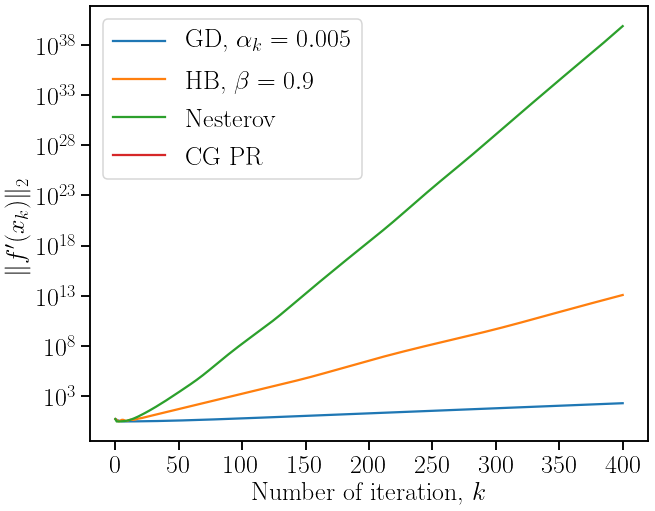

In [10]:
figsize = (10, 8)
fontsize = 26
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in methods[m].get_convergence()], label=m)
plt.semilogy([np.linalg.norm(grad(x)) for x in scopt_cg_array], label="CG PR")
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)